In [1]:
using Pkg

In [2]:
# load required packages
using Statistics, DataFrames, Query, VegaDatasets, VegaLite

In [3]:
# load csv reading package
using CSV

In [5]:
# read HNP CSV into a dataframe
ue_df = CSV.read("HNP_StatsData.csv") |>
  DataFrame

,Country Name,Country Code,Indicator Name
,String,String,String
1,Arab World,ARB,"Adolescent fertility rate (births per 1,000 women ages 15-19)"
2,Arab World,ARB,Adults (ages 15+) and children (0-14 years) living with HIV
3,Arab World,ARB,Adults (ages 15+) and children (ages 0-14) newly infected with HIV
4,Arab World,ARB,Adults (ages 15+) living with HIV
5,Arab World,ARB,Adults (ages 15+) newly infected with HIV
6,Arab World,ARB,"Age at first marriage, female"
7,Arab World,ARB,"Age at first marriage, male"
8,Arab World,ARB,Age dependency ratio (% of working-age population)
9,Arab World,ARB,"Age dependency ratio, old"


In [6]:
# overview the dataframe
describe(ue_df)

,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,Country Name,,Afghanistan,,Zimbabwe
2,Country Code,,ABW,,ZWE
3,Indicator Name,,AIDS estimated deaths (UNAIDS estimates),,Women's share of population ages 15+ living with HIV (%)
4,Indicator Code,,HD.HCI.OVRL,,SP.UWT.TFRT
5,1960,4.16825e6,0.0,3756.0,3.03144e9
6,1961,4.16621e6,-2.49882,3220.0,3.07248e9
7,1962,4.17473e6,-3.92722e6,2817.0,3.12546e9
8,1963,4.31249e6,-3.20668,3288.5,3.19056e9
9,1964,4.39659e6,-3.07861,3344.0,3.25606e9


In [7]:
# select the useful rows and columns we need
ue_df = ue_df[ue_df[:,3] .== "Unemployment, total (% of total labor force)",
    [1, 2, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]]

,Country Name,Country Code,2011,2012
,String,String,Float64?,Float64?
1,Arab World,ARB,10.2847,10.4908
2,Caribbean small states,CSS,10.4141,11.0101
3,Central Europe and the Baltics,CEB,9.78936,9.97771
4,Early-demographic dividend,EAR,5.66664,5.64458
5,East Asia & Pacific,EAS,4.1598,4.07486
6,East Asia & Pacific (excluding high income),EAP,4.13901,4.06279
7,East Asia & Pacific (IDA & IBRD countries),TEA,4.15613,4.07871
8,Euro area,EMU,10.1107,11.2887
9,Europe & Central Asia,ECS,8.7607,8.9711


In [8]:
# find out which row number the ligitimate country starts
showall(ue_df)

259×12 DataFrame
│ Row │ Country Name                                         │ Country Code │
│     │ String                                               │ String       │
├─────┼──────────────────────────────────────────────────────┼──────────────┤
│ 1   │ Arab World                                           │ ARB          │
│ 2   │ Caribbean small states                               │ CSS          │
│ 3   │ Central Europe and the Baltics                       │ CEB          │
│ 4   │ Early-demographic dividend                           │ EAR          │
│ 5   │ East Asia & Pacific                                  │ EAS          │
│ 6   │ East Asia & Pacific (excluding high income)          │ EAP          │
│ 7   │ East Asia & Pacific (IDA & IBRD countries)           │ TEA          │
│ 8   │ Euro area                                            │ EMU          │
│ 9   │ Europe & Central Asia                                │ ECS          │
│ 10  │ Europe & Central Asia (excluding high i

│ 142 │ Jordan                                               │ JOR          │
│ 143 │ Kazakhstan                                           │ KAZ          │
│ 144 │ Kenya                                                │ KEN          │
│ 145 │ Kiribati                                             │ KIR          │
│ 146 │ Korea, Dem. People’s Rep.                            │ PRK          │
│ 147 │ Korea, Rep.                                          │ KOR          │
│ 148 │ Kosovo                                               │ XKX          │
│ 149 │ Kuwait                                               │ KWT          │
│ 150 │ Kyrgyz Republic                                      │ KGZ          │
│ 151 │ Lao PDR                                              │ LAO          │
│ 152 │ Latvia                                               │ LVA          │
│ 153 │ Lebanon                                              │ LBN          │
│ 154 │ Lesotho                                              │ L

├─────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ 1   │ 10.2847  │ 10.4908  │ 10.5741  │ 10.6546  │ 10.6753  │ 10.4509  │
│ 2   │ 10.4141  │ 11.0101  │ 11.5431  │ 10.7659  │ 10.564   │ 10.4834  │
│ 3   │ 9.78936  │ 9.97771  │ 10.0447  │ 8.94981  │ 7.81478  │ 6.48766  │
│ 4   │ 5.66664  │ 5.64458  │ 5.71913  │ 5.64022  │ 5.77738  │ 5.78099  │
│ 5   │ 4.1598   │ 4.07486  │ 4.07011  │ 4.03927  │ 4.07916  │ 3.98654  │
│ 6   │ 4.13901  │ 4.06279  │ 4.07427  │ 4.05412  │ 4.11051  │ 4.02446  │
│ 7   │ 4.15613  │ 4.07871  │ 4.09021  │ 4.0705   │ 4.12826  │ 4.04162  │
│ 8   │ 10.1107  │ 11.2887  │ 11.9287  │ 11.6049  │ 10.8397  │ 10.0274  │
│ 9   │ 8.7607   │ 8.9711   │ 9.20288  │ 8.95734  │ 8.55822  │ 8.0961   │
│ 10  │ 7.85394  │ 7.25376  │ 7.27109  │ 7.48666  │ 7.61081  │ 7.62424  │
│ 11  │ 8.03269  │ 7.56026  │ 7.61865  │ 7.67674  │ 7.64341  │ 7.47168  │
│ 12  │ 9.83614  │ 10.8026  │ 11.3231  │ 10.8433  │ 10.0237  │ 9.12479  │
│ 13  │ 5.6377   │ 5.6685   │ 5.82494 

│ 160 │ 2.56     │ 1.97     │ 1.82     │ 1.7      │ 1.81     │ 1.9      │
│ 161 │ 2.019    │ 0.599    │ 0.936    │ 1.327    │ 1.785    │ 1.763    │
│ 162 │ 5.914    │ 5.928    │ 5.946    │ 5.887    │ 5.846    │ 5.795    │
│ 163 │ 3.05     │ 3.04     │ 3.11     │ 2.88     │ 3.1      │ 3.44     │
│ 164 │ 4.409    │ 4.695    │ 4.996    │ 5.21     │ 5.667    │ 6.12     │
│ 165 │ 6.9      │ 7.096    │ 7.3      │ 6.375    │ 7.729    │ 7.553    │
│ 166 │ 6.378    │ 6.196    │ 6.106    │ 5.725    │ 5.379    │ 4.687    │
│ 167 │ missing  │ missing  │ missing  │ missing  │ missing  │ missing  │
│ 168 │ 9.846    │ 9.865    │ 9.888    │ 9.811    │ 9.758    │ 9.692    │
│ 169 │ 7.447    │ 7.472    │ 7.322    │ 7.467    │ 7.41     │ 6.814    │
│ 170 │ 5.17     │ 4.887    │ 4.914    │ 4.809    │ 4.313    │ 3.859    │
│ 171 │ missing  │ missing  │ missing  │ missing  │ missing  │ missing  │
│ 172 │ 6.682    │ 5.578    │ 5.104    │ 3.856    │ 3.694    │ 4.185    │
│ 173 │ missing  │ missing  │ missing 

│ 81  │ 1.848    │ 1.838    │ 1.891    │ 1.943    │
│ 82  │ 7.622    │ 7.41     │ 7.487    │ 7.535    │
│ 83  │ 6.958    │ 7.233    │ 7.09     │ 7.096    │
│ 84  │ 4.441    │ 4.276    │ 4.32     │ 4.37     │
│ 85  │ 8.872    │ 9.111    │ 9.707    │ 9.744    │
│ 86  │ 4.375    │ 4.302    │ 4.336    │ 4.366    │
│ 87  │ 4.273    │ 4.193    │ 4.236    │ 4.25     │
│ 88  │ 9.763    │ 9.67     │ 9.472    │ 9.282    │
│ 89  │ 8.142    │ 9.632    │ 11.854   │ 12.734   │
│ 90  │ 3.273    │ 3.21     │ 3.317    │ 3.423    │
│ 91  │ 11.208   │ 8.432    │ 6.935    │ 7.114    │
│ 92  │ 1.7      │ 1.7      │ 1.638    │ 1.59     │
│ 93  │ missing  │ missing  │ missing  │ missing  │
│ 94  │ 11.052   │ 8.37     │ 7.274    │ 7.234    │
│ 95  │ 2.89     │ 2.243    │ 1.933    │ 1.91     │
│ 96  │ 5.743    │ 4.975    │ 4.913    │ 4.846    │
│ 97  │ 10.382   │ 10.257   │ 10.295   │ 10.323   │
│ 98  │ missing  │ missing  │ missing  │ missing  │
│ 99  │ 5.832    │ 5.739    │ 5.845    │ 5.919    │
│ 100 │ 3.83

│ 228 │ 17.06    │ 16.9     │ 16.535   │ 16.618   │
│ 229 │ 7.081    │ 6.994    │ 7.334    │ 7.472    │
│ 230 │ 6.718    │ 6.346    │ 6.476    │ 6.674    │
│ 231 │ 4.797    │ 4.713    │ 4.581    │ 4.849    │
│ 232 │ 8.362    │ 8.257    │ 8.37     │ 8.448    │
│ 233 │ 11.274   │ 11.133   │ 11.017   │ 10.989   │
│ 234 │ 2.033    │ 1.99     │ 1.98     │ 1.981    │
│ 235 │ 0.83     │ 0.766    │ 0.754    │ 0.803    │
│ 236 │ 4.566    │ 4.479    │ 4.548    │ 4.603    │
│ 237 │ 2.126    │ 2.079    │ 2.038    │ 2.005    │
│ 238 │ 1.08     │ 1.052    │ 1.117    │ 1.157    │
│ 239 │ 2.706    │ 2.5      │ 2.686    │ 2.795    │
│ 240 │ 15.379   │ 15.459   │ 16.022   │ 16.154   │
│ 241 │ 10.819   │ 10.89    │ 13.49    │ 12.941   │
│ 242 │ 3.859    │ 3.8      │ 3.913    │ 4.071    │
│ 243 │ missing  │ missing  │ missing  │ missing  │
│ 244 │ missing  │ missing  │ missing  │ missing  │
│ 245 │ 1.79     │ 1.749    │ 1.843    │ 1.919    │
│ 246 │ 9.51     │ 8.799    │ 8.882    │ 8.934    │
│ 247 │ 2.46

In [9]:
# filter the rows are just countries
ue_df = ue_df[43:259, :]

,Country Name,Country Code,2011,2012,2013,2014,2015
,String,String,Float64?,Float64?,Float64?,Float64?,Float64?
1,Afghanistan,AFG,11.488,11.508,11.534,11.448,11.387
2,Albania,ALB,13.481,13.376,15.866,17.49,17.08
3,Algeria,DZA,9.96,10.97,9.82,10.207,11.206
4,American Samoa,ASM,missing,missing,missing,missing,missing
5,Andorra,AND,missing,missing,missing,missing,missing
6,Angola,AGO,7.362,7.379,7.4,7.331,7.282
7,Antigua and Barbuda,ATG,missing,missing,missing,missing,missing
8,Argentina,ARG,7.18,7.217,7.1,7.268,7.75
9,Armenia,ARM,18.443,17.301,16.179,17.498,18.261


In [10]:
# remove the missing rows
ue_df = ue_df[completecases(ue_df), :]

,Country Name,Country Code,2011,2012,2013,2014,2015
,String,String,Float64?,Float64?,Float64?,Float64?,Float64?
1,Afghanistan,AFG,11.488,11.508,11.534,11.448,11.387
2,Albania,ALB,13.481,13.376,15.866,17.49,17.08
3,Algeria,DZA,9.96,10.97,9.82,10.207,11.206
4,Angola,AGO,7.362,7.379,7.4,7.331,7.282
5,Argentina,ARG,7.18,7.217,7.1,7.268,7.75
6,Armenia,ARM,18.443,17.301,16.179,17.498,18.261
7,Australia,AUS,5.081,5.224,5.662,6.077,6.054
8,Austria,AUT,4.564,4.865,5.335,5.62,5.723
9,Azerbaijan,AZE,5.42,5.19,4.97,4.91,4.96


In [11]:
# rename some columns to more suitable names
rename!(ue_df, Symbol("Country Name")=>Symbol("Country"), Symbol("Country Code")=>Symbol("ISO"))

,Country,ISO,2011,2012,2013,2014,2015
,String,String,Float64?,Float64?,Float64?,Float64?,Float64?
1,Afghanistan,AFG,11.488,11.508,11.534,11.448,11.387
2,Albania,ALB,13.481,13.376,15.866,17.49,17.08
3,Algeria,DZA,9.96,10.97,9.82,10.207,11.206
4,Angola,AGO,7.362,7.379,7.4,7.331,7.282
5,Argentina,ARG,7.18,7.217,7.1,7.268,7.75
6,Armenia,ARM,18.443,17.301,16.179,17.498,18.261
7,Australia,AUS,5.081,5.224,5.662,6.077,6.054
8,Austria,AUT,4.564,4.865,5.335,5.62,5.723
9,Azerbaijan,AZE,5.42,5.19,4.97,4.91,4.96


In [12]:
# read Covid-19 CSV
covid_df = CSV.read("WHO-COVID-19-global-data.csv") |>
  DataFrame

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases
,Date…,String,String,String,Int64,Int64
1,2020-01-03,AF,Afghanistan,EMRO,0,0
2,2020-01-04,AF,Afghanistan,EMRO,0,0
3,2020-01-05,AF,Afghanistan,EMRO,0,0
4,2020-01-06,AF,Afghanistan,EMRO,0,0
5,2020-01-07,AF,Afghanistan,EMRO,0,0
6,2020-01-08,AF,Afghanistan,EMRO,0,0
7,2020-01-09,AF,Afghanistan,EMRO,0,0
8,2020-01-10,AF,Afghanistan,EMRO,0,0
9,2020-01-11,AF,Afghanistan,EMRO,0,0


In [13]:
# rename the columns with more suitable names
rename!(covid_df, Symbol("Date_reported")=>Symbol("Date"), Symbol(" Country")=>Symbol("Country"), 
    Symbol(" WHO_region")=>Symbol("WHO_region"))

,Date,Country_code,Country,WHO_region,New_cases,Cumulative_cases
,Date…,String,String,String,Int64,Int64
1,2020-01-03,AF,Afghanistan,EMRO,0,0
2,2020-01-04,AF,Afghanistan,EMRO,0,0
3,2020-01-05,AF,Afghanistan,EMRO,0,0
4,2020-01-06,AF,Afghanistan,EMRO,0,0
5,2020-01-07,AF,Afghanistan,EMRO,0,0
6,2020-01-08,AF,Afghanistan,EMRO,0,0
7,2020-01-09,AF,Afghanistan,EMRO,0,0
8,2020-01-10,AF,Afghanistan,EMRO,0,0
9,2020-01-11,AF,Afghanistan,EMRO,0,0


In [14]:
# we only need the WHO regions information with corresponding countries from this table
area_df = by(DataFrame(covid_df[:,[3, 4]]), :Country) do group
    DataFrame(WHO_region = group[!, :WHO_region][1])
end

,Country,WHO_region
,String,String
1,Afghanistan,EMRO
2,Albania,EURO
3,Algeria,AFRO
4,American Samoa,WPRO
5,Andorra,EURO
6,Angola,AFRO
7,Anguilla,AMRO
8,Antigua and Barbuda,AMRO
9,Argentina,AMRO


In [15]:
# ceate a function to translate WHO region names
function translate_region(region)
    if region == "AMRO"
        region = "Americas"
    elseif region == "SEARO"
        region = "South-East Asia"
    elseif region == "EURO"
        region = "European"
    elseif region == "AFRO"
        region = "African"
    elseif region == "WPRO"
        region = "Western Pacific" 
    elseif region == "EMRO"
        region = "Eastern Mediterranean" 
    else
        region = region
    end
end

translate_region (generic function with 1 method)

In [16]:
# apply the translate function
area_df.WHO_region = map(translate_region, area_df.WHO_region)

235-element Array{String,1}:
 "Eastern Mediterranean"
 "European"
 "African"
 "Western Pacific"
 "European"
 "African"
 "Americas"
 "Americas"
 "Americas"
 "European"
 "Americas"
 "Western Pacific"
 "European"
 ⋮
 "African"
 "Americas"
 "Americas"
 "Americas"
 "European"
 "Western Pacific"
 "Americas"
 "Western Pacific"
 "Western Pacific"
 "Eastern Mediterranean"
 "African"
 "African"

In [17]:
# outer jion WHO region information with unemployment dataframe
unemployment_df = outerjoin(ue_df, area_df, on = :Country)

,Country,ISO,2011,2012,2013,2014,2015
,String,String?,Float64?,Float64?,Float64?,Float64?,Float64?
1,Afghanistan,AFG,11.488,11.508,11.534,11.448,11.387
2,Albania,ALB,13.481,13.376,15.866,17.49,17.08
3,Algeria,DZA,9.96,10.97,9.82,10.207,11.206
4,Angola,AGO,7.362,7.379,7.4,7.331,7.282
5,Argentina,ARG,7.18,7.217,7.1,7.268,7.75
6,Armenia,ARM,18.443,17.301,16.179,17.498,18.261
7,Australia,AUS,5.081,5.224,5.662,6.077,6.054
8,Austria,AUT,4.564,4.865,5.335,5.62,5.723
9,Azerbaijan,AZE,5.42,5.19,4.97,4.91,4.96


In [18]:
# find out the unmatched countries
miss_df = unemployment_df[unemployment_df.WHO_region .=== missing, :]
print(miss_df.Country)

["Bahamas, The", "Bolivia", "Channel Islands", "Congo, Dem. Rep.", "Congo, Rep.", "Cote d'Ivoire", "Czech Republic", "Egypt, Arab Rep.", "Gambia, The", "Hong Kong SAR, China", "Iran, Islamic Rep.", "Korea, Dem. People’s Rep.", "Korea, Rep.", "Kyrgyz Republic", "Lao PDR", "Macao SAR, China", "Moldova", "Slovak Republic", "St. Lucia", "St. Vincent and the Grenadines", "Tanzania", "United Kingdom", "United States", "Venezuela, RB", "Vietnam", "Virgin Islands (U.S.)", "West Bank and Gaza", "Yemen, Rep."]

In [19]:
# list the countries still available to be joined
missing_df = unemployment_df[unemployment_df.ISO .=== missing, :]
print(missing_df.Country)

["American Samoa", "Andorra", "Anguilla", "Antigua and Barbuda", "Aruba", "Bahamas", "Bermuda", "Bolivia (Plurinational State of)", "Bonaire, Sint Eustatius and Saba", "British Virgin Islands", "Cayman Islands", "Congo", "Cook Islands", "Côte d’Ivoire", "Curaçao", "Czechia", "Democratic People's Republic of Korea", "Democratic Republic of the Congo", "Dominica", "Egypt", "Falkland Islands (Malvinas)", "Faroe Islands", "French Guiana", "Gambia", "Gibraltar", "Greenland", "Grenada", "Guadeloupe", "Guernsey", "Holy See", "Iran (Islamic Republic of)", "Isle of Man", "Jersey", "Kiribati", "Kosovo[1]", "Kyrgyzstan", "Lao People's Democratic Republic", "Liechtenstein", "Marshall Islands", "Martinique", "Mayotte", "Micronesia (Federated States of)", "Monaco", "Montserrat", "Nauru", "Niue", "Northern Mariana Islands (Commonwealth of the)", "occupied Palestinian territory, including east Jerusalem", "Other", "Palau", "Pitcairn Islands", "Republic of Korea", "Republic of Moldova", "Réunion", "Sai

In [20]:
# create a function to amend the country names to get join again
function correct_country(name)
    if name == "Bahamas, The"
        name = "Bahamas"
    elseif name == "Bolivia"
        name = "Bolivia (Plurinational State of)"
    elseif name == "Congo, Dem. Rep."
        name = "Congo"
    elseif name == "Congo, Rep."
        name = "Democratic Republic of the Congo"
    elseif name == "Cote d'Ivoire"
        name = "Côte d’Ivoire"
    elseif name == "Czech Republic"
        name = "Czechia"
    elseif name == "Egypt, Arab Rep."
        name = "Egypt"
    elseif name == "Gambia, The"
        name = "Gambia"
    elseif name == "Hong Kong SAR, China"
        name = "China"
    elseif name == "Iran, Islamic Rep."
        name = "Iran (Islamic Republic of)"
    elseif name == "Korea, Dem. People’s Rep."
        name = "Democratic People's Republic of Korea"
    elseif name == "Korea, Rep."
        name = "Republic of Korea"
    elseif name == "Kyrgyz Republic"
        name = "Kyrgyzstan"
    elseif name == "Lao PDR"
        name = "Lao People's Democratic Republic"
    elseif name == "Macao SAR, China"
        name = "China"
    elseif name == "Moldova"
        name = "Republic of Moldova"
    elseif name == "Slovak Republic"
        name = "Slovakia"
    elseif name == "St. Lucia"
        name = "Saint Lucia"
    elseif name == "St. Vincent and the Grenadines"
        name = "Saint Vincent and the Grenadines"
    elseif name == "Tanzania"
        name = "United Republic of Tanzania"
    elseif name == "United Kingdom"
        name = "The United Kingdom"
    elseif name == "United States"
        name = "United States of America"
    elseif name == "Venezuela, RB"
        name = "Venezuela (Bolivarian Republic of)"
    elseif name == "Vietnam"
        name = "Viet Nam"
    elseif name == "Virgin Islands (U.S.)"
        name = "United States Virgin Islands"
    elseif name == "Yemen, Rep."
        name = "Yemen"
    elseif name == "West Bank and Gaza"
        name = "occupied Palestinian territory, including east Jerusalem"
    else
        name = name
    end
end

correct_country (generic function with 1 method)

In [21]:
# apply the function to change country names from unemployment dataframe
ue_df.Country = map(correct_country, ue_df.Country)

187-element PooledArrays.PooledArray{String,UInt32,1,Array{UInt32,1}}:
 "Afghanistan"
 "Albania"
 "Algeria"
 "Angola"
 "Argentina"
 "Armenia"
 "Australia"
 "Austria"
 "Azerbaijan"
 "Bahamas"
 "Bahrain"
 "Bangladesh"
 "Barbados"
 ⋮
 "The United Kingdom"
 "United States of America"
 "Uruguay"
 "Uzbekistan"
 "Vanuatu"
 "Venezuela (Bolivarian Republic of)"
 "Viet Nam"
 "United States Virgin Islands"
 "occupied Palestinian territory, including east Jerusalem"
 "Yemen"
 "Zambia"
 "Zimbabwe"

In [22]:
# now we just use left join to make a join again
unemployment_df = leftjoin(ue_df, area_df, on = :Country)

,Country,ISO,2011,2012,2013,2014
,String,String,Float64?,Float64?,Float64?,Float64?
1,Afghanistan,AFG,11.488,11.508,11.534,11.448
2,Albania,ALB,13.481,13.376,15.866,17.49
3,Algeria,DZA,9.96,10.97,9.82,10.207
4,Angola,AGO,7.362,7.379,7.4,7.331
5,Argentina,ARG,7.18,7.217,7.1,7.268
6,Armenia,ARM,18.443,17.301,16.179,17.498
7,Australia,AUS,5.081,5.224,5.662,6.077
8,Austria,AUT,4.564,4.865,5.335,5.62
9,Azerbaijan,AZE,5.42,5.19,4.97,4.91


In [23]:
# have a look the unmatched country again
miss_df = unemployment_df[unemployment_df.WHO_region .=== missing, :]
print(miss_df.Country)

["Channel Islands"]

Now, there is only one country is unmatched, which is not available.

In [24]:
# have a look country "China" with multiple rows but with different ISO country codes
unemployment_df |> @filter(_.Country == "China")

Country,ISO,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,WHO_region
"""China""","""CHN""",4.548,4.57,4.59,4.609,4.629,4.535,4.441,4.276,4.32,4.37,"""Western Pacific"""
"""China""","""HKG""",3.42,3.29,3.4,3.3,3.32,3.39,3.09,2.903,3.629,4.265,"""Western Pacific"""
"""China""","""MAC""",2.56,1.97,1.82,1.7,1.81,1.9,2.0,1.966,2.237,2.505,"""Western Pacific"""


In [25]:
# create a function to change their country names back after the join is done
function correct_back(ISO, country)
    if ISO == "HKG"
        country = "China HongKong"
    elseif ISO == "MAC"
        country = "China Macao"
    else
        country = country
    end
end

correct_back (generic function with 1 method)

In [26]:
# apply the function to change them
unemployment_df.Country = map(correct_back, unemployment_df.ISO, unemployment_df.Country)

187-element Array{String,1}:
 "Afghanistan"
 "Albania"
 "Algeria"
 "Angola"
 "Argentina"
 "Armenia"
 "Australia"
 "Austria"
 "Azerbaijan"
 "Bahamas"
 "Bahrain"
 "Bangladesh"
 "Barbados"
 ⋮
 "The United Kingdom"
 "United States of America"
 "Uruguay"
 "Uzbekistan"
 "Vanuatu"
 "Venezuela (Bolivarian Republic of)"
 "Viet Nam"
 "United States Virgin Islands"
 "occupied Palestinian territory, including east Jerusalem"
 "Yemen"
 "Zambia"
 "Zimbabwe"

In [27]:
# fill the missing WHO region names to "Other"
replace!(unemployment_df.WHO_region, missing => "Other")

187-element Array{Union{Missing, String},1}:
 "Eastern Mediterranean"
 "European"
 "African"
 "African"
 "Americas"
 "European"
 "Western Pacific"
 "European"
 "European"
 "Americas"
 "Eastern Mediterranean"
 "South-East Asia"
 "Americas"
 ⋮
 "European"
 "Americas"
 "Americas"
 "European"
 "Western Pacific"
 "Americas"
 "Western Pacific"
 "Americas"
 "Eastern Mediterranean"
 "Eastern Mediterranean"
 "African"
 "African"

In [28]:
# reshape the dataframe to a long dataframe
unemployment_long = stack(unemployment_df, ["20$i" for i in 11:20])

,Country,ISO,WHO_region,variable,value
,String,String,String?,Cat…,Float64?
1,Afghanistan,AFG,Eastern Mediterranean,2011,11.488
2,Albania,ALB,European,2011,13.481
3,Algeria,DZA,African,2011,9.96
4,Angola,AGO,African,2011,7.362
5,Argentina,ARG,Americas,2011,7.18
6,Armenia,ARM,European,2011,18.443
7,Australia,AUS,Western Pacific,2011,5.081
8,Austria,AUT,European,2011,4.564
9,Azerbaijan,AZE,European,2011,5.42


In [29]:
# change the column with a more suitable name
rename!(unemployment_long, Symbol("variable")=>Symbol("Date"))

,Country,ISO,WHO_region,Date,value
,String,String,String?,Cat…,Float64?
1,Afghanistan,AFG,Eastern Mediterranean,2011,11.488
2,Albania,ALB,European,2011,13.481
3,Algeria,DZA,African,2011,9.96
4,Angola,AGO,African,2011,7.362
5,Argentina,ARG,Americas,2011,7.18
6,Armenia,ARM,European,2011,18.443
7,Australia,AUS,Western Pacific,2011,5.081
8,Austria,AUT,European,2011,4.564
9,Azerbaijan,AZE,European,2011,5.42


In [30]:
# convert year column back to string data type
unemployment_long.Date = convert(Array{String}, unemployment_long.Date)

1870-element Array{String,1}:
 "2011"
 "2011"
 "2011"
 "2011"
 "2011"
 "2011"
 "2011"
 "2011"
 "2011"
 "2011"
 "2011"
 "2011"
 "2011"
 ⋮
 "2020"
 "2020"
 "2020"
 "2020"
 "2020"
 "2020"
 "2020"
 "2020"
 "2020"
 "2020"
 "2020"
 "2020"

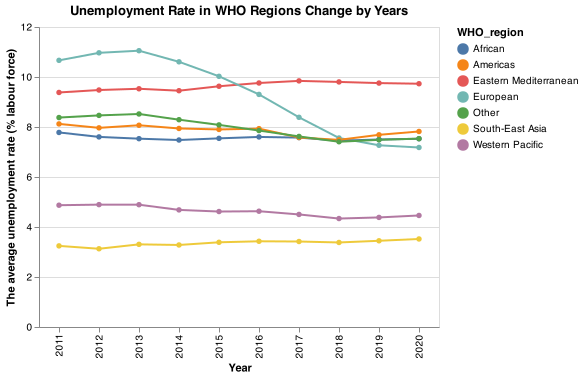

In [31]:
# plot unemployment rate in different WHO region in each year
unemployment_long |>
    @vlplot(transform=[{aggregate=[{op=:mean, field=:value, as=:mean_value}], groupby=[:WHO_region, :Date]}],
            mark={:line, point=true},
            x={"Date:o", axis={title="Year"}},
            y={"mean_value:q", axis={title="The average unemployment rate (% labour force)"}},
            title="Unemployment Rate in WHO Regions Change by Years",
            color=:WHO_region,            
            width=400,
            height=300
            )

European region used to have the highest unemployment rate before 2015, it was keep droping since 2013, the dropping slowed down since 2018, and keep drop in year 2020. Eastern Mediterranean took over the highest unemployment rate from early 2015, but it has a slightly decreasing slope since 2017 till now. South-East Asia has a comparatively constant low unemployment rate, and it seems increasing till now, which is the same as the other 4 regions hasn't been mentioned.

In [32]:
# create a new column to calculate the unemployment rate change from year 2019 to 2020
unemployment_df."19-20Diff" = unemployment_df."2020" - unemployment_df."2019"

187-element Array{Float64,1}:
  0.04599952697749998
  0.48199939727780006
 -0.17900085449219993
 -0.11199998855590998
  0.6470003128051793
 -0.3649997711181996
  0.05999994277954013
  0.10500001907349077
  0.45100021362303977
  0.9100008010865004
  0.049000024795532005
 -0.03900003433227983
  0.6069993972778001
  ⋮
  0.26399970054625976
  0.18000006675719993
  0.04600048065185014
  0.16499996185303
  0.02299976348876953
  0.5799999237060494
  0.009000062942509768
  0.0970001220703196
 -0.07100105285650216
 -0.07999992370599962
 -0.013000488281299738
  0.03700017929076971

In [33]:
# overview the dataframe
describe(unemployment_df)

,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,Country,,Afghanistan,,"occupied Palestinian territory, including east Jerusalem"
2,ISO,,AFG,,ZWE
3,2011,8.16418,0.317,6.694,31.377
4,2012,8.1815,0.384,6.722,31.016
5,2013,8.22105,0.28,6.452,28.996
6,2014,8.02792,0.2,6.396,28.03
7,2015,7.89995,0.17,6.357,27.694
8,2016,7.74424,0.15,6.161,26.551
9,2017,7.4219,0.14,5.743,27.071


In [34]:
# rearrange the columns order
unemployment_df = unemployment_df[[1, 2, 13, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14]]

,Country,ISO,WHO_region,2011,2012
,String,String,String?,Float64?,Float64?
1,Afghanistan,AFG,Eastern Mediterranean,11.488,11.508
2,Albania,ALB,European,13.481,13.376
3,Algeria,DZA,African,9.96,10.97
4,Angola,AGO,African,7.362,7.379
5,Argentina,ARG,Americas,7.18,7.217
6,Armenia,ARM,European,18.443,17.301
7,Australia,AUS,Western Pacific,5.081,5.224
8,Austria,AUT,European,4.564,4.865
9,Azerbaijan,AZE,European,5.42,5.19


In [35]:
# convert all columns to correct data type
unemployment_df.WHO_region = convert(Array{String}, unemployment_df.WHO_region)
unemployment_df."2011" = convert(Array{Float64}, unemployment_df."2011")
unemployment_df."2012" = convert(Array{Float64}, unemployment_df."2012")
unemployment_df."2013" = convert(Array{Float64}, unemployment_df."2013")
unemployment_df."2014" = convert(Array{Float64}, unemployment_df."2014")
unemployment_df."2015" = convert(Array{Float64}, unemployment_df."2015")
unemployment_df."2016" = convert(Array{Float64}, unemployment_df."2016")
unemployment_df."2017" = convert(Array{Float64}, unemployment_df."2017")
unemployment_df."2018" = convert(Array{Float64}, unemployment_df."2018")
unemployment_df."2019" = convert(Array{Float64}, unemployment_df."2019")
unemployment_df."2020" = convert(Array{Float64}, unemployment_df."2020")

187-element Array{Float64,1}:
 11.1639995574951
 12.8129997253418
 11.5249996185303
  6.77400016784668
 10.4359998703003
 16.625
  5.32800006866455
  4.77899980545044
  5.96000003814697
 11.2700004577637
  0.763000011444092
  4.15100002288818
 10.9379997253418
  ⋮
  4.11499977111816
  3.86199998855591
  8.77700042724609
  6.08199977874756
  4.40799999237061
  9.38099956512451
  2.0220000743866
  8.75899982452393
 26.0979995727539
 12.8299999237061
 11.4119997024536
  4.99100017547607

In [36]:
describe(unemployment_df)

,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,Country,,Afghanistan,,"occupied Palestinian territory, including east Jerusalem"
2,ISO,,AFG,,ZWE
3,WHO_region,,African,,Western Pacific
4,2011,8.16418,0.317,6.694,31.377
5,2012,8.1815,0.384,6.722,31.016
6,2013,8.22105,0.28,6.452,28.996
7,2014,8.02792,0.2,6.396,28.03
8,2015,7.89995,0.17,6.357,27.694
9,2016,7.74424,0.15,6.161,26.551


In [37]:
CSV.write("Unemployment.csv", unemployment_df)

"Unemployment.csv"

In [38]:
# filter out the dataframe with top 10 umemployment rate increased from 2019 to 2020
unemployment_topTen = sort(unemployment_df, :"19-20Diff", rev = true)[1:10,:]

,Country,ISO,WHO_region,2011,2012,2013
,String,String,String,Float64,Float64,Float64
1,Bahamas,BHS,Americas,14.52,14.02,16.18
2,Costa Rica,CRI,Americas,10.139,9.784,8.768
3,Argentina,ARG,Americas,7.18,7.217,7.1
4,China HongKong,HKG,Western Pacific,3.42,3.29,3.4
5,Barbados,BRB,Americas,11.19,11.59,11.55
6,Venezuela (Bolivarian Republic of),VEN,Americas,6.902,6.601,7.54
7,Botswana,BWA,African,17.865,17.889,17.921
8,Nicaragua,NIC,Americas,6.447,5.208,5.28
9,Albania,ALB,European,13.481,13.376,15.866


In [39]:
# reshape the dataframe to a long dataframe
unemployment_topTen_long = stack(unemployment_topTen, ["20$i" for i in 11:20])

,Country,ISO,WHO_region,19-20Diff,variable
,String,String,String,Float64,Cat…
1,Bahamas,BHS,Americas,0.910001,2011
2,Costa Rica,CRI,Americas,0.88,2011
3,Argentina,ARG,Americas,0.647,2011
4,China HongKong,HKG,Western Pacific,0.636,2011
5,Barbados,BRB,Americas,0.606999,2011
6,Venezuela (Bolivarian Republic of),VEN,Americas,0.58,2011
7,Botswana,BWA,African,0.528,2011
8,Nicaragua,NIC,Americas,0.518,2011
9,Albania,ALB,European,0.481999,2011


In [40]:
# rename the column with a more suitable name
rename!(unemployment_topTen_long, Symbol("variable")=>Symbol("Date"))

,Country,ISO,WHO_region,19-20Diff,Date,value
,String,String,String,Float64,Cat…,Float64
1,Bahamas,BHS,Americas,0.910001,2011,14.52
2,Costa Rica,CRI,Americas,0.88,2011,10.139
3,Argentina,ARG,Americas,0.647,2011,7.18
4,China HongKong,HKG,Western Pacific,0.636,2011,3.42
5,Barbados,BRB,Americas,0.606999,2011,11.19
6,Venezuela (Bolivarian Republic of),VEN,Americas,0.58,2011,6.902
7,Botswana,BWA,African,0.528,2011,17.865
8,Nicaragua,NIC,Americas,0.518,2011,6.447
9,Albania,ALB,European,0.481999,2011,13.481


In [41]:
# convert the correct data type for Date column
unemployment_topTen_long.Date = convert(Array{String}, unemployment_topTen_long.Date)

100-element Array{String,1}:
 "2011"
 "2011"
 "2011"
 "2011"
 "2011"
 "2011"
 "2011"
 "2011"
 "2011"
 "2011"
 "2012"
 "2012"
 "2012"
 ⋮
 "2019"
 "2019"
 "2020"
 "2020"
 "2020"
 "2020"
 "2020"
 "2020"
 "2020"
 "2020"
 "2020"
 "2020"

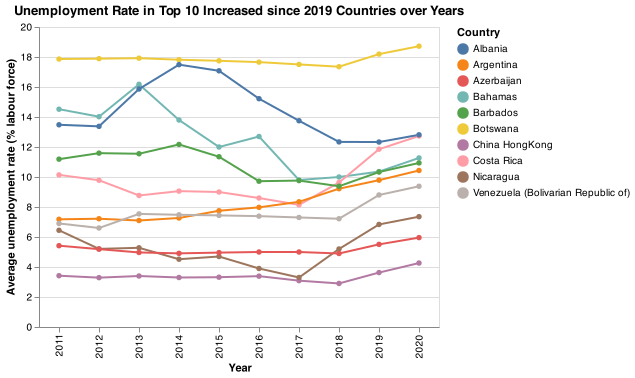

In [42]:
# Plot the top 10 increased unemployment rate from year 2019 to 2020 over years
unemployment_topTen_long |>
    @vlplot(transform=[{aggregate=[{op=:mean, field=:value, as=:mean_value}], groupby=[:Country, :Date]}],
            mark={:line, point=true},
            x={"Date:o", axis={title="Year"}},
            y={"mean_value:q", axis={title="Average unemployment rate (% labour force)"}},
            title="Unemployment Rate in Top 10 Increased since 2019 Countries over Years",
            color=:Country,            
            width=400,
            height=300
            )

Even Bahamas has a highest increasing unemployment rate from year 2019, Botswana has a comparatively constant higheat unemployment rate over the whole period, to almost 19% of total population. Most of the countries' unemployment rates started increase since either 2017 or 2018, but Argintina started increase sin 2013.